# Project: Wrangling and Analyze Data

## Table of Contents
- [Data Gathering](#Gathering)
- [Assessing Data](#Assessing)
- [Cleaning Data](#Cleaning)
- [ Storing Data](#Storing)
- [ Analyzing and Visualizing Data](#Analyzing)


<a id='Gathering'></a>
## Data Gathering


In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import requests 
import tweepy 
import json
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
#read twitter archive dataset
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Download the image predictions dataset
r=requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
#open file to save content
with open('image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [3]:
#Read image predictions dataset
image_prediction=pd.read_csv('image-predictions.tsv',sep='\t')
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
#Download the tweet-json.txt
r2=requests.get('https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
#open file to save content
with open('tweet_json.txt',mode='wb') as file:
    file.write(r2.content)

In [6]:
#List for append lines to create data frame
df_list=[]
#open tweet_json file to read it line by line
with open('tweet_json.txt') as file:
    for line in file:
        df_list.append(json.loads(line))

In [7]:
#Create data frame 
tweet_data=pd.DataFrame(df_list,columns=['id','retweet_count','favorite_count'])
tweet_data.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [8]:
#Rename id to tweet_id 
tweet_data.rename(columns={'id':'tweet_id'},inplace=True)

In [9]:
#save tweet_data 
tweet_data.to_csv('tweet_data.csv',index=False)

In [4]:
#Read tweet_data file
tweet_df=pd.read_csv('tweet_data.csv')
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='Assessing'></a>
## Assessing Data


**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
#checking dataset visually 
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
#Checking columns and data type
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Number of retweet
sum(twitter_archive.retweeted_status_user_id.value_counts())

181

In [8]:
#Checking rating_numerator distribution 
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [9]:
#Loop for display rating that have 9 or less values
 
for i in twitter_archive.rating_numerator.value_counts().index[12:]: #the numbers that have 9 or less values
    for index in twitter_archive[twitter_archive.rating_numerator==i]['text'].index: #index for the numbers to print the tweet
        print(twitter_archive[twitter_archive.rating_numerator==i]['text'][index]) #print tweet
        print('\t')#new line
        print('rating is {}'.format(i)) #print Rating
        print('\t')
        print('index {}'.format(index)) #print index
        print('\t')

RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…
	
rating is 1
	
index 605
	
After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me
	
rating is 1
	
index 1446
	
What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0
	
rating is 1
	
index 1869
	
The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
	
rating is 1
	
index 1940
	
After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes
	
rating is 1
	
index 2038
	
Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO
	
rating is 1
	
index 2091
	
Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not eve

In [16]:
#Checking rating_denominator distribution
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
#Loop for display rating that have 3 or less values

for i in twitter_archive.rating_denominator.value_counts().index[1:]:#the numbers that have 3 or less values
    for index in twitter_archive[twitter_archive.rating_denominator==i]['text'].index: #index for the numbers to print the tweet
        print(twitter_archive[twitter_archive.rating_denominator==i]['text'][index])#print tweet
        print('\t')#new line
        print('rating denominator is {}'.format(i))#print Rating
        print('\t')
        print('index {}'.format(index)) #print index
        print('\t')

RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
	
rating denominator is 11
	
index 784
	
After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
	
rating denominator is 11
	
index 1068
	
This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
	
rating denominator is 11
	
index 1662
	
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
	
rating denominator is 50
	
index 1202
	
From left to right:
Cletus, Jerome, Alejandro, Burp, &amp; Titson
None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
	
rating denominator is 50
	
index 1274
	
Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
	
rating denominator is

In [18]:
#Checking statistics for ratings columns
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [19]:
#Checking duplicates
sum(twitter_archive.tweet_id.duplicated())

0

In [20]:
#Checking names
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Daisy          7
Buddy          7
an             7
Toby           7
Bailey         7
Oscar          6
Scout          6
Leo            6
Jack           6
Jax            6
Stanley        6
Milo           6
Rusty          6
Dave           6
Koda           6
Bella          6
Larry          5
            ... 
Beckham        1
Chloe          1
Dutch          1
Derby          1
Jeffri         1
Pip            1
Blue           1
Pubert         1
Tango          1
Venti          1
Lili           1
Kathmandu      1
Odin           1
Duddles        1
Kuyu           1
Tuck           1
Perry          1
Ole            1
Kody           1
Lassie         1
Crimson        1
Flash          1
Rinna          1
Berkeley       1
Ridley         1
Dudley         1
Vinnie         1
Jessiga       

In [21]:
#Checking dataset visually 
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [22]:
#Checking columns and data type
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
#Checking image number dis
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
#Checking statistics
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
#Checking duplicates
sum(image_prediction.tweet_id.duplicated())

0

In [26]:
#checking dataset visually 
tweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [27]:
#checking columns and data type
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [28]:
#Checking statistics
tweet_df.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [29]:
#Checking duplicates
sum(tweet_df.tweet_id.duplicated())

0

### Quality issues
##### `twitter_archive` table
1.Retweet

2.Tweet_id is an integer instead of string 

3.Erroneous datatypes(timestamp)

4.Rating other animals 

5.Invalid names(None,a,an)

6.Uncorrect rating

7.Unnecessary columns (source,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,
retweeted_status_timestamp, expanded_urls)

##### `image_prediction` table
1.Some names uppercase while other lowercase
##### `tweet_df` table
1.Missing rows (2354 instead of 2356)

### Tidiness issues
1.Four variables columns in Twitter_archive table.

2.Image_prodiction and tweet_df should be part of the Twitter_archive table.


<a id='Cleaning'></a>
## Cleaning Data


In [13]:
# Make copies of original pieces of data
twitter_archive_clean=twitter_archive.copy()
image_prediction_clean=image_prediction.copy()
tweet_df_clean=tweet_df.copy()

#### Four variables columns in Twitter_archive table.

#### Define
Melt doggo,floofer,pupper and poppp columns to dogs_stage columns.then drop the four columns.

#### Code

In [14]:
#melt the four columns
twitter_archive_clean=pd.melt(twitter_archive_clean, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','retweeted_status_id','retweeted_status_user_id',
                                                              'retweeted_status_timestamp','expanded_urls','rating_numerator',
                                                              'rating_denominator','name'],
                              var_name='dogs',value_name='dogs_stage')
#Drop dogs column
twitter_archive_clean.drop('dogs',axis=1,inplace=True)
#Drop duplicates
twitter_archive_clean=twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id',keep='last')
#Replace None string with null
twitter_archive_clean.dogs_stage.replace('None',np.nan,inplace=True)


#### Test

In [15]:
#checking dogs_stage column
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dogs_stage                    380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 276.1+ KB


In [16]:
#checing dogs_stage distribution
twitter_archive_clean['dogs_stage'].value_counts()

pupper     257
doggo       83
puppo       30
floofer     10
Name: dogs_stage, dtype: int64

#### Image_prodiction and tweet_df should be part of the Twitter_archive table.

#### Define:
Merge all table.

#### Code

In [17]:
#Merge twitter_archive table and tweet_df table
twitter_archive_clean=pd.merge(twitter_archive_clean,tweet_df_clean,on='tweet_id',how='left')
#Merge twitter_archive table and image_prediction table
twitter_archive_clean=pd.merge(twitter_archive_clean,image_prediction_clean,on='tweet_id',how='left')

#### Test

In [18]:
#Testing if code worked 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dogs_stage                    380 non-null object
retweet_count                 2354 non-null float64
favorite_count                2354 non-null float64
jpg_url                       2075 non-null object
img_num                       2

#### Retweet and Unnecessary columns (source,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp, expanded_urls)

#### Define:
Drop retweet and unnecessary columns.

#### code

In [19]:
#Drop Retweets
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean.retweeted_status_id)]

#Drop unnecessary 
twitter_archive_clean.drop(['source',
                            'in_reply_to_status_id',
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id', 
                            'retweeted_status_timestamp', 
                            'expanded_urls'], axis=1,inplace=True)

#### Test

In [20]:
#Checking if columns and retweets drop
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2 to 2355
Data columns (total 20 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dogs_stage            344 non-null object
retweet_count         2175 non-null float64
favorite_count        2175 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dtypes: float64(6), int64(3), o

In [21]:
#Checking if columns and retweets drop
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,667549055577362432,2015-11-20 03:44:31 +0000,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,NaN,2454.0,6138.0,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,electric_fan,0.984377,False,spotlight,0.007737,False,lampshade,0.001901,False
3,667546741521195010,2015-11-20 03:35:20 +0000,Here is George. George took a selfie of his ne...,9,10,George,NaN,138.0,355.0,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,toy_poodle,0.787424,True,miniature_poodle,0.202225,True,teddy,0.004047,False
4,667544320556335104,2015-11-20 03:25:43 +0000,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,NaN,568.0,917.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
5,667538891197542400,2015-11-20 03:04:08 +0000,This is a southwest Coriander named Klint. Hat...,9,10,a,NaN,72.0,220.0,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,Yorkshire_terrier,0.618957,True,silky_terrier,0.300313,True,Australian_terrier,0.053412,True
6,667724302356258817,2015-11-20 15:20:54 +0000,What a dog to start the day with. Very calm. L...,7,10,None,NaN,341.0,517.0,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False


#### tweet_id is an integer instead of string Erroneous datatypes(timestamp)

#### Define:
Change tweet_id type to string and timestamp type to DateTime type.

#### Code

In [22]:
#Change tweet_id to string 
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
#Change timestamp to Datetime 
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [23]:
#Testing if code worked 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2 to 2355
Data columns (total 20 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dogs_stage            344 non-null object
retweet_count         2175 non-null float64
favorite_count        2175 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
dtypes: datetime64[ns]

#### some names uppercase while other lowercase

#### Define:
Capitalize name,p1,p2 and p3 columns.

#### Code

In [24]:
#capitalize columns
twitter_archive_clean.p1=twitter_archive_clean.p1.str.capitalize()
twitter_archive_clean.p2=twitter_archive_clean.p2.str.capitalize()
twitter_archive_clean.p3=twitter_archive_clean.p3.str.capitalize()
twitter_archive_clean.name=twitter_archive_clean.name.str.capitalize()

#### Test

In [25]:
#Testing if code worked 
twitter_archive_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,667549055577362432,2015-11-20 03:44:31,Never seen dog like this. Breathes heavy. Tilt...,1,10,None,NaN,2454.0,6138.0,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1.0,Electric_fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
3,667546741521195010,2015-11-20 03:35:20,Here is George. George took a selfie of his ne...,9,10,George,NaN,138.0,355.0,https://pbs.twimg.com/media/CUOaOWXWcAA0_Jy.jpg,1.0,Toy_poodle,0.787424,True,Miniature_poodle,0.202225,True,Teddy,0.004047,False
4,667544320556335104,2015-11-20 03:25:43,"This is Kial. Kial is either wearing a cape, w...",10,10,Kial,NaN,568.0,917.0,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,1.0,Pomeranian,0.412893,True,Pembroke,0.312958,True,Chihuahua,0.071960,True
5,667538891197542400,2015-11-20 03:04:08,This is a southwest Coriander named Klint. Hat...,9,10,A,NaN,72.0,220.0,https://pbs.twimg.com/media/CUOTFZOW4AABsfW.jpg,1.0,Yorkshire_terrier,0.618957,True,Silky_terrier,0.300313,True,Australian_terrier,0.053412,True
6,667724302356258817,2015-11-20 15:20:54,What a dog to start the day with. Very calm. L...,7,10,None,NaN,341.0,517.0,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1.0,Ibex,0.619098,False,Bighorn,0.125119,False,Ram,0.074673,False


#### invalid names(None,a,an)

#### Define:
Replace None,a and an with Null

#### Code

In [26]:
#Replace a,an and None
twitter_archive_clean.name=twitter_archive_clean.name.replace(['A','a','an','None'],np.nan)

#### Test

In [27]:
#Testing if code worked 
twitter_archive_clean.name.value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Penny         9
Tucker        9
The           8
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Stanley       6
Oscar         6
Bailey        6
An            6
Bo            6
Bella         6
Koda          6
Jax           6
Leo           5
Louis         5
Milo          5
Buddy         5
Rusty         5
Chester       5
Scout         5
Dave          5
Bentley       5
Jerry         4
             ..
Chase         1
Vinnie        1
Karl          1
Laika         1
Burt          1
Trevith       1
Erik          1
Willie        1
Pupcasso      1
Barney        1
Godi          1
O             1
Barry         1
Glenn         1
Josep         1
Perry         1
Naphaniel     1
Stella        1
Farfle        1
Lacy          1
Snicku        1
Napolean      1
Alejandro     1
Beckham       1
Acro          1
Chloe         1
Bubba         1
Ridley        1
Arlen         1
Ralphus       1
Name: name, Length: 954,

#### Rating other animals and uncurrect rating

#### Define:
Correct rating tweet manually and drop other animals rating 

#### Code

In [28]:
#Correcting ratings
twitter_archive_clean.loc[28,'rating_numerator']=12
twitter_archive_clean.loc[100,'rating_numerator']=9
twitter_archive_clean.loc[100,'rating_denominator']=10
twitter_archive_clean.loc[957,'rating_numerator']=11.26
twitter_archive_clean.loc[527,'rating_numerator']=11
twitter_archive_clean.loc[527,'rating_denominator']=10
twitter_archive_clean.loc[1549,'rating_numerator']=13
twitter_archive_clean.loc[1549,'rating_denominator']=10
twitter_archive_clean.loc[1986,'rating_numerator']=11.27
twitter_archive_clean.loc[1246,'rating_numerator']=9.75
#Drop all rows that rating equal to 1
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator==1].index,inplace=True)
#List of indexes need to be drop
list_to_drop_num=[1007,924,690,125,72,34,1387,1547,1663,1387,365,1507,1506,196]
#drop other animal rating 
twitter_archive_clean.drop(list_to_drop_num,inplace=True)

In [29]:
#Correcting ratings
twitter_archive_clean.loc[366,'rating_numerator']=10
twitter_archive_clean.loc[366,'rating_denominator']=10

twitter_archive_clean.loc[1563,'rating_numerator']=14
twitter_archive_clean.loc[1563,'rating_denominator']=10

twitter_archive_clean.loc[500,'rating_numerator']=13
twitter_archive_clean.loc[500,'rating_denominator']=10
#drop other animal rating 
twitter_archive_clean.drop([411],inplace=True)

#### Test

In [30]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      496
10.00      440
11.00      422
13.00      304
9.00       155
8.00        98
7.00        53
14.00       44
5.00        36
6.00        32
3.00        19
4.00        17
2.00         8
420.00       2
0.00         2
20.00        1
17.00        1
44.00        1
60.00        1
50.00        1
80.00        1
26.00        1
143.00       1
1776.00      1
182.00       1
99.00        1
165.00       1
75.00        1
9.75         1
45.00        1
204.00       1
666.00       1
121.00       1
88.00        1
11.27        1
11.26        1
27.00        1
15.00        1
960.00       1
84.00        1
24.00        1
144.00       1
Name: rating_numerator, dtype: int64

In [31]:
twitter_archive_clean.rating_denominator.value_counts()

10.0     2133
50.0        3
20.0        2
11.0        2
80.0        2
120.0       1
40.0        1
16.0        1
150.0       1
70.0        1
15.0        1
0.0         1
130.0       1
110.0       1
170.0       1
90.0        1
7.0         1
Name: rating_denominator, dtype: int64

<a id='Storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [32]:
#saving cleaned data
twitter_archive_clean.to_csv('twitter_archive_master.csv',index=False)

<a id='Analyzing'></a>
## Analyzing and Visualizing Data


In [33]:
#checking statistics
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
count,2155.000000,2154.000000,2153.000000,2153.000000,1975.000000,1975.000000,1.975000e+03,1.975000e+03
mean,13.277160,10.501393,2756.233163,8737.820715,1.204051,0.594232,1.345960e-01,6.039953e-02
std,47.939924,7.050692,4649.155842,12059.448698,0.561681,0.271771,1.006428e-01,5.101542e-02
min,0.000000,0.000000,0.000000,52.000000,1.000000,0.055379,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,610.000000,1930.000000,1.000000,0.362880,5.397835e-02,1.619495e-02
50%,11.000000,10.000000,1341.000000,4042.000000,1.000000,0.588230,1.180890e-01,4.952370e-02
75%,12.000000,10.000000,3220.000000,11089.000000,1.000000,0.845942,1.954815e-01,9.203645e-02
max,1776.000000,170.000000,79515.000000,132810.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [34]:
##Checking tweet that has the highest retweet 
twitter_archive_clean[twitter_archive_clean.retweet_count==79515]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2049,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13.0,10.0,NaN,doggo,79515.0,131075.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333,True,Ice_bear,0.044681,False,Whippet,0.018442,True


In [35]:
#Checking tweet that has the highest favorite 
twitter_archive_clean[twitter_archive_clean.favorite_count==132810.000000]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dogs_stage,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2342,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13.0,10.0,NaN,puppo,48265.0,132810.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [36]:
#Checking most popular dogs stage
twitter_archive_clean.groupby('dogs_stage').mean()

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
dogs_stage,,,,,,,,
doggo,11.853333,10.0,6348.786667,17369.093333,1.285714,0.577058,0.157341,0.062083
floofer,11.800000,10.0,4083.600000,11674.900000,1.125000,0.577395,0.158096,0.058460
pupper,10.820513,10.0,2522.401709,7385.705128,1.245283,0.614405,0.128549,0.055486
puppo,12.080000,10.0,6847.040000,21871.080000,1.434783,0.704875,0.134584,0.045979


In [37]:
twitter_archive_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
The           8
Winston       8
Lola          8
Toby          7
Daisy         7
Koda          6
Oscar         6
Jax           6
Bella         6
Bo            6
Stanley       6
Bailey        6
Rusty         5
Louis         5
An            5
Chester       5
Bentley       5
Leo           5
Milo          5
Dave          5
Scout         5
Buddy         5
Reggie        4
             ..
Karl          1
Laika         1
Davey         1
Jareld        1
Hamrick       1
Lambeau       1
Burt          1
Trevith       1
Cupcake       1
O             1
Barry         1
Glenn         1
Josep         1
Perry         1
Naphaniel     1
Stella        1
Farfle        1
Lacy          1
Snicku        1
Napolean      1
Alejandro     1
Beckham       1
Acro          1
Chloe         1
Bubba         1
Ridley        1
Arlen         1
Willie        1
Erik          1
Ralphus       1
Name: name, Length: 949,

### Insights:
1.It seems like the Labrador retriever breed has the highest  retweet and favorite.

2.Puppy has the average highest rating, retweet and favorite.

3.Lucy and Charlie are the most popular dog name.

### Visualization

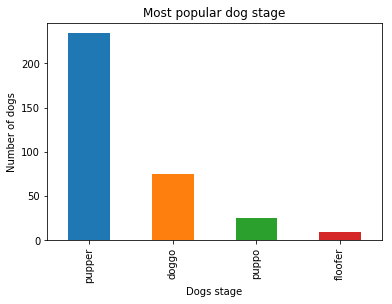

In [40]:
#most popular dogs stage
twitter_archive_clean.dogs_stage.value_counts().plot(kind='bar')
plt.xlabel('Dogs stage')
plt.ylabel('Number of dogs')
plt.title('Most popular dog stage');